<a href="https://colab.research.google.com/github/LegendSeyi/ML-PROJECTS/blob/main/Occupancy_prediction_IOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML PROJECT: PREDICTION OF OCCUPANCY USING IOT DEVICES FOR SMART HOME

In [2]:
import numpy as np
import pandas as pd
import random

No real data available yet, so i generated synthetic data as a test data for the project.

In [3]:
np.random.seed(42)

# Simulation parameters
days = 7
samples_per_hour = 6  # every 10 minutes
total_samples = days * 24 * samples_per_hour

timestamps = pd.date_range(
    start="2026-01-01",
    periods=total_samples,
    freq="10min"
)

data = []

for ts in timestamps:
    hour = ts.hour

    # Occupancy probability pattern
    if 6 <= hour <= 8 or 18 <= hour <= 23:
        occupancy = np.random.choice([1,0], p=[0.75,0.25])
    elif 9 <= hour <= 17:
        occupancy = np.random.choice([1,0], p=[0.2,0.8])
    else:
        occupancy = np.random.choice([1,0], p=[0.1,0.9])

    # Voltage simulation (stable grid)
    voltage = np.random.normal(230, 3)

    # Current simulation
    if occupancy == 1:
        current = np.random.normal(1.8, 0.4)
    else:
        current = np.random.normal(0.2, 0.05)

    power = voltage * current

    data.append([ts, voltage, current, power, occupancy])

df = pd.DataFrame(
    data,
    columns=["timestamp", "voltage", "current", "power", "occupancy"]
)

df.head()

,timestamp,voltage,current,power,occupancy
0,2026-01-01 00:00:00,226.664360,0.215945,48.947060,0
1,2026-01-01 00:10:00,234.737638,0.238372,55.954818,0
2,2026-01-01 00:20:00,228.257366,1.589932,362.913707,1
3,2026-01-01 00:30:00,230.725887,0.104336,24.073013,0
4,2026-01-01 00:40:00,232.449335,0.123806,28.778669,0


In [4]:
df.shape

(1008, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1008 non-null   datetime64[ns]
 1   voltage    1008 non-null   float64       
 2   current    1008 non-null   float64       
 3   power      1008 non-null   float64       
 4   occupancy  1008 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 39.5 KB


In [6]:
df.describe()

,timestamp,voltage,current,power,occupancy
count,1008,1008.000000,1008.000000,1008.000000,1008.000000
mean,2026-01-04 11:55:00,229.854385,0.839893,193.018202,0.391865
min,2026-01-01 00:00:00,219.557574,0.026429,6.049943,0.000000
25%,2026-01-02 17:57:30,227.925862,0.195965,44.811979,0.000000
50%,2026-01-04 11:55:00,229.923686,0.247219,56.880219,0.000000
75%,2026-01-06 05:52:30,231.738471,1.692795,390.491371,1.000000
max,2026-01-07 23:50:00,238.334939,3.043967,718.336748,1.000000
std,NaN,2.970307,0.831187,191.072739,0.488409


In [7]:
df[['voltage','current','power','occupancy']] = df[['voltage','current','power','occupancy']].round(2)

In [8]:
df

,timestamp,voltage,current,power,occupancy
0,2026-01-01 00:00:00,226.66,0.22,48.95,0
1,2026-01-01 00:10:00,234.74,0.24,55.95,0
2,2026-01-01 00:20:00,228.26,1.59,362.91,1
3,2026-01-01 00:30:00,230.73,0.10,24.07,0
4,2026-01-01 00:40:00,232.45,0.12,28.78,0
...,...,...,...,...,...
1003,2026-01-07 23:10:00,230.55,2.88,663.35,1
1004,2026-01-07 23:20:00,225.72,2.11,476.85,1
1005,2026-01-07 23:30:00,229.76,1.47,337.00,1
1006,2026-01-07 23:40:00,226.44,0.87,197.28,1


In [9]:
df.power.describe()

,power
count,1008.000000
mean,193.018155
std,191.072656
min,6.050000
25%,44.815000
50%,56.880000
75%,390.487500
max,718.340000


In [10]:
df.current.describe()

,current
count,1008.000000
mean,0.840030
std,0.831121
min,0.030000
25%,0.200000
50%,0.250000
75%,1.690000
max,3.040000


In [11]:
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek

In [12]:
df.head()

,timestamp,voltage,current,power,occupancy,hour,dayofweek
0,2026-01-01 00:00:00,226.66,0.22,48.95,0,0,3
1,2026-01-01 00:10:00,234.74,0.24,55.95,0,0,3
2,2026-01-01 00:20:00,228.26,1.59,362.91,1,0,3
3,2026-01-01 00:30:00,230.73,0.10,24.07,0,0,3
4,2026-01-01 00:40:00,232.45,0.12,28.78,0,0,3


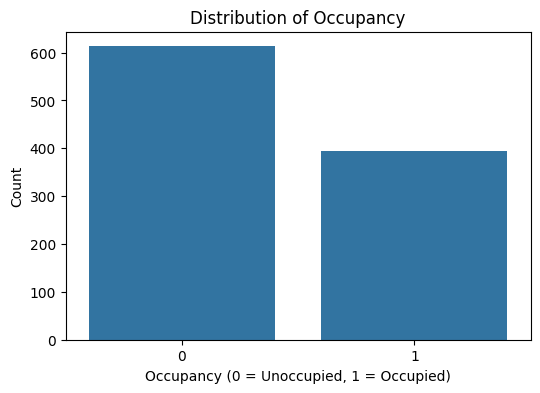

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the 'occupancy' column
plt.figure(figsize=(6, 4))
sns.countplot(x='occupancy', data=df)
plt.title('Distribution of Occupancy')
plt.xlabel('Occupancy (0 = Unoccupied, 1 = Occupied)')
plt.ylabel('Count')
plt.show()

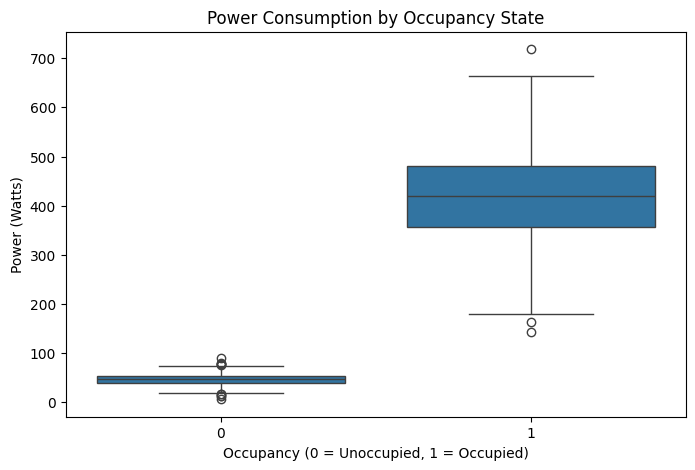

In [14]:
# Visualize power consumption for occupied vs. unoccupied states
plt.figure(figsize=(8, 5))
sns.boxplot(x='occupancy', y='power', data=df)
plt.title('Power Consumption by Occupancy State')
plt.xlabel('Occupancy (0 = Unoccupied, 1 = Occupied)')
plt.ylabel('Power (Watts)')
plt.show()

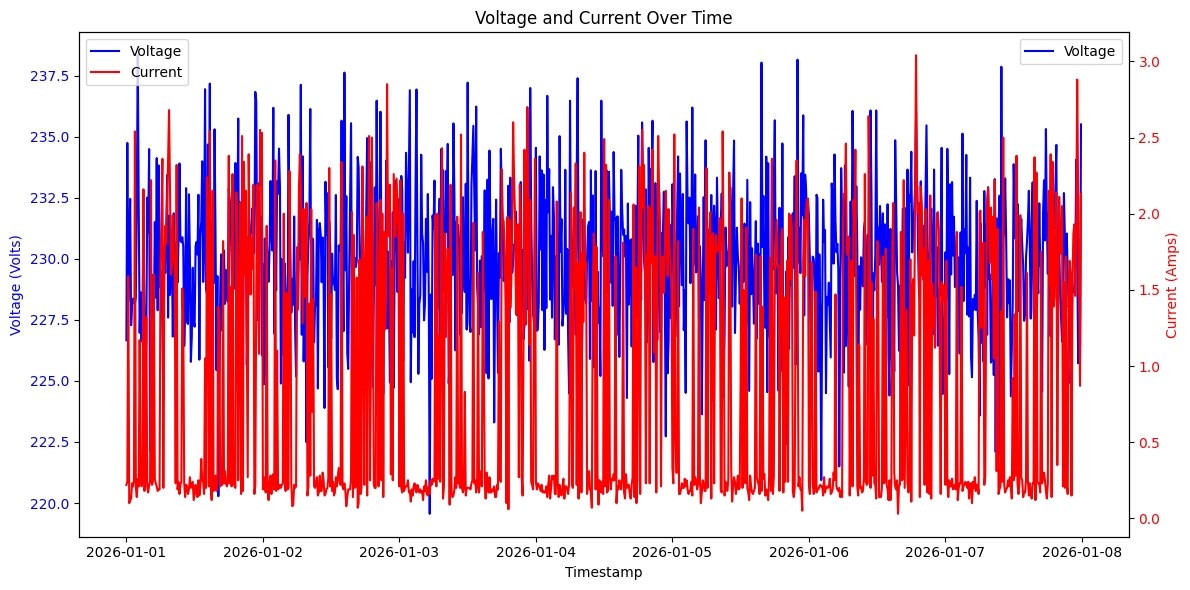

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Voltage on the first y-axis
sns.lineplot(x='timestamp', y='voltage', data=df, ax=ax1, color='blue', label='Voltage')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Voltage (Volts)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Current
ax2 = ax1.twinx()
sns.lineplot(x='timestamp', y='current', data=df, ax=ax2, color='red', label='Current')
ax2.set_ylabel('Current (Amps)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Voltage and Current Over Time')
fig.tight_layout() # Adjust layout

# Add legends for both lines
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles + handles2, labels + labels2, loc='upper left')

plt.show()

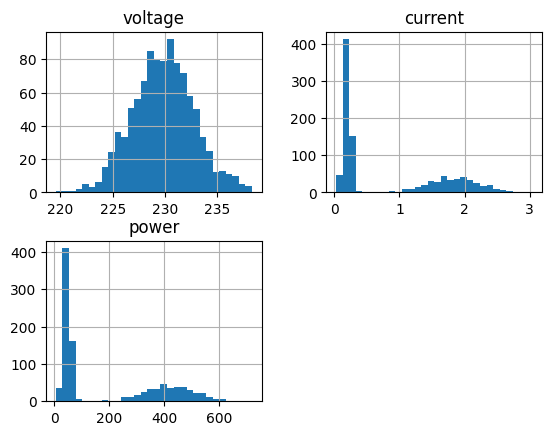

In [16]:
import matplotlib.pyplot as plt

df[["voltage","current","power"]].hist(bins=30)
plt.show()


MODEL DEPLOYMENT

In [17]:
X = df[["voltage","current","power","hour","dayofweek"]]
y = df["occupancy"]


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [22]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 1.0


In [24]:
model.feature_importances_


array([2.98649630e-03, 4.69425912e-01, 4.71829023e-01, 5.53200288e-02,
       4.38539143e-04])